In [1]:
# Importing dependencies
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif

In [2]:
# Reading the cleaned dataset extracted from the database
chd_df = pd.read_csv(Path('ETL/heart_disease_females.csv'))
chd_df.head()

,patient_female_id,age,education,current_smoker,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,tot_chol,sys_bp,dia_bp,bmi,heart_rate,glucose,ten_year_chd
0,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
1,1,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
2,2,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
3,3,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
4,4,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1


# Exploratory Data Analysis

# Data Cleaning

In [3]:
# Getting the number of rows and columns
chd_df.shape

(2034, 16)

In [4]:
# Listing the columns
chd_df.columns

Index(['patient_female_id', 'age', 'education', 'current_smoker',
       'cigs_per_day', 'bp_meds', 'prevalent_stroke', 'prevalent_hyp',
       'diabetes', 'tot_chol', 'sys_bp', 'dia_bp', 'bmi', 'heart_rate',
       'glucose', 'ten_year_chd'],
      dtype='object')

In [5]:
# Check the Datatypes
chd_df.dtypes

patient_female_id      int64
age                    int64
education            float64
current_smoker         int64
cigs_per_day         float64
bp_meds              float64
prevalent_stroke       int64
prevalent_hyp          int64
diabetes               int64
tot_chol             float64
sys_bp               float64
dia_bp               float64
bmi                  float64
heart_rate           float64
glucose              float64
ten_year_chd           int64
dtype: object

In [6]:
#Finding the number of unique values in each column
chd_df.nunique()

patient_female_id    2034
age                    39
education               4
current_smoker          2
cigs_per_day           25
bp_meds                 2
prevalent_stroke        2
prevalent_hyp           2
diabetes                2
tot_chol              223
sys_bp                220
dia_bp                131
bmi                   986
heart_rate             67
glucose               111
ten_year_chd            2
dtype: int64

In [7]:
# Getting the count of values in different columns
print(chd_df["education"].value_counts())
print(chd_df["current_smoker"].value_counts())
print(chd_df["bp_meds"].value_counts())
print(chd_df["prevalent_stroke"].value_counts())
print(chd_df["prevalent_hyp"].value_counts())
print(chd_df["diabetes"].value_counts())
print(chd_df["ten_year_chd"].value_counts())

1.0    815
2.0    650
3.0    397
4.0    172
Name: education, dtype: int64
0    1227
1     807
Name: current_smoker, dtype: int64
0.0    1956
1.0      78
Name: bp_meds, dtype: int64
0    2022
1      12
Name: prevalent_stroke, dtype: int64
0    1401
1     633
Name: prevalent_hyp, dtype: int64
0    1983
1      51
Name: diabetes, dtype: int64
0    1784
1     250
Name: ten_year_chd, dtype: int64


In [8]:
#Finding Duplicates
# Code reference: https://www.geeksforgeeks.org/find-duplicate-rows-in-a-dataframe-based-on-all-or-selected-columns/
duplicate = chd_df[chd_df.duplicated()]
print("Duplicate Rows :")
duplicate

Duplicate Rows :


,patient_female_id,age,education,current_smoker,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,tot_chol,sys_bp,dia_bp,bmi,heart_rate,glucose,ten_year_chd


In [9]:
# Finding Null Values
chd_df.isnull().sum()

patient_female_id    0
age                  0
education            0
current_smoker       0
cigs_per_day         0
bp_meds              0
prevalent_stroke     0
prevalent_hyp        0
diabetes             0
tot_chol             0
sys_bp               0
dia_bp               0
bmi                  0
heart_rate           0
glucose              0
ten_year_chd         0
dtype: int64

In [10]:
# Display Statistical Analysis
chd_df.describe()

,patient_female_id,age,education,current_smoker,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,tot_chol,sys_bp,dia_bp,bmi,heart_rate,glucose,ten_year_chd
count,2034.000000,2034.000000,2034.000000,2034.000000,2034.000000,2034.000000,2034.000000,2034.000000,2034.000000,2034.000000,2034.000000,2034.000000,2034.000000,2034.000000,2034.000000,2034.000000
mean,1016.500000,49.743854,1.963618,0.396755,5.497050,0.038348,0.005900,0.311209,0.025074,239.638151,133.265241,82.360619,25.519651,76.960177,81.791052,0.122911
std,587.309544,8.573273,0.966051,0.489345,8.739338,0.192082,0.076601,0.463102,0.156388,46.168321,23.986809,12.308748,4.516267,12.122018,23.586245,0.328415
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,135.000000,83.500000,51.000000,15.960000,46.000000,40.000000,0.000000
25%,508.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,116.000000,74.000000,22.540000,69.000000,72.000000,0.000000
50%,1016.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,237.000000,128.000000,81.000000,24.720000,75.000000,78.000000,0.000000
75%,1524.750000,56.000000,3.000000,1.000000,10.000000,0.000000,0.000000,1.000000,0.000000,268.000000,146.000000,89.000000,27.710000,85.000000,86.000000,0.000000
max,2033.000000,70.000000,4.000000,1.000000,43.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [11]:
# Dropping unwanted columns
newchd_df =  chd_df.drop(columns = "patient_female_id")
newchd_df.head()

,age,education,current_smoker,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,tot_chol,sys_bp,dia_bp,bmi,heart_rate,glucose,ten_year_chd
0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
1,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
2,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
3,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
4,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1


# Feature Engineering

## Analyzing Distributions

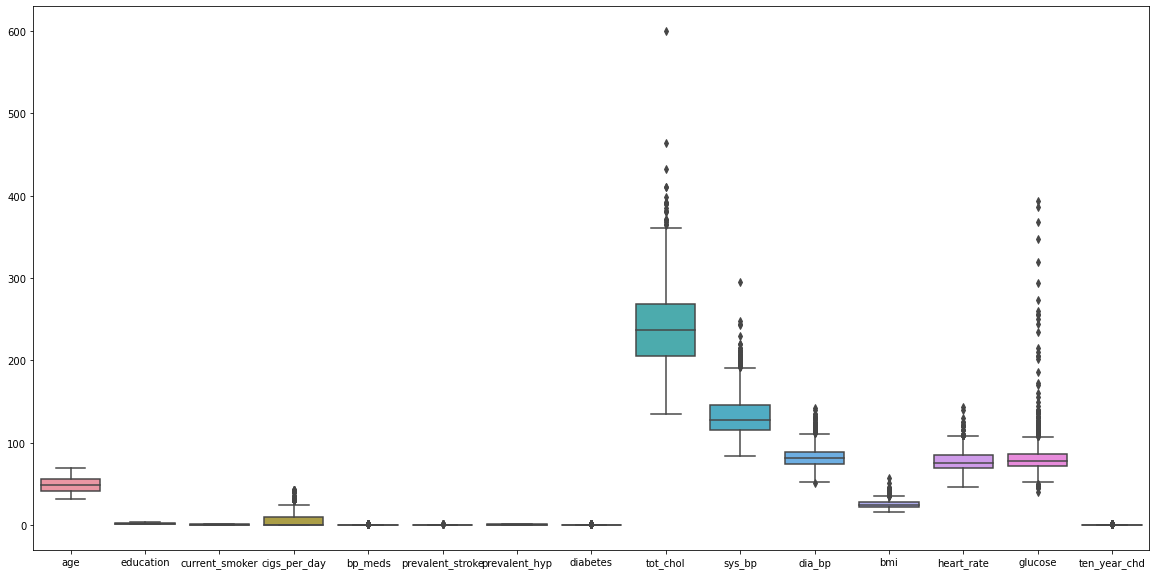

In [12]:
# Displaying a BoxPlot to check for outliers
plt.figure(figsize=(20,10), facecolor='w')
sns.boxplot(data=newchd_df)
plt.show()

In [13]:
# Printing outlier in Total Cholestrol 
# Code reference: https://www.geeksforgeeks.org/interquartile-range-to-detect-outliers-in-data/
outlier =[]
for x in newchd_df['tot_chol']:
    if (x> 500):
        outlier.append(x)
print(' outlier in the dataset is', outlier)

 outlier in the dataset is [600.0]


In [14]:
# Printing outlier in Systolic Blood Pressure
outlier =[]
for x in newchd_df['sys_bp']:
    if (x> 250):
        outlier.append(x)
print(' outlier in the dataset is', outlier)

 outlier in the dataset is [295.0]


In [15]:
# Removing extreme outliers- Total Cholestrol
# Code reference: https://stackoverflow.com/questions/43136137/drop-a-specific-row-in-pandas
i = newchd_df[newchd_df["tot_chol"] == 600].index
newchd_df = newchd_df.drop(i)
newchd_df.shape

(2033, 15)

In [16]:
# Removing extreme outliers- Sys BP
j = newchd_df[newchd_df["sys_bp"]==295].index
newchd_df = newchd_df.drop(j)
newchd_df.shape

(2032, 15)

In [17]:
# Display Statistical Analysis
newchd_df.describe()

,age,education,current_smoker,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,tot_chol,sys_bp,dia_bp,bmi,heart_rate,glucose,ten_year_chd
count,2032.000000,2032.000000,2032.000000,2032.000000,2032.000000,2032.000000,2032.000000,2032.000000,2032.000000,2032.000000,2032.000000,2032.000000,2032.000000,2032.000000,2032.000000
mean,49.735728,1.964075,0.397146,5.502461,0.038386,0.005906,0.310531,0.024606,239.454232,133.172736,82.328986,25.511752,76.952264,81.768209,0.122047
std,8.571508,0.966290,0.489427,8.741937,0.192173,0.076639,0.462825,0.154960,45.492327,23.721440,12.256527,4.508422,12.123368,23.561017,0.327421
min,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,135.000000,83.500000,51.000000,15.960000,46.000000,40.000000,0.000000
25%,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,116.000000,74.000000,22.540000,69.000000,72.000000,0.000000
50%,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,237.000000,128.000000,81.000000,24.710000,75.000000,78.000000,0.000000
75%,56.000000,3.000000,1.000000,10.000000,0.000000,0.000000,1.000000,0.000000,268.000000,146.000000,89.000000,27.695000,85.000000,86.000000,0.000000
max,70.000000,4.000000,1.000000,43.000000,1.000000,1.000000,1.000000,1.000000,464.000000,248.000000,142.500000,56.800000,143.000000,394.000000,1.000000


/Users/njraman/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='education', ylabel='count'>

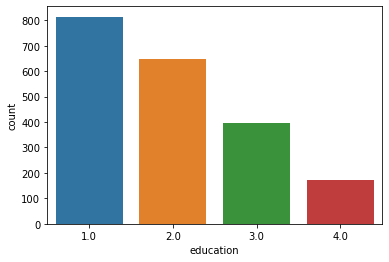

In [18]:
# Plotting data distribution in categorical variables- education
sns.countplot(newchd_df.education)

/Users/njraman/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='current_smoker', ylabel='count'>

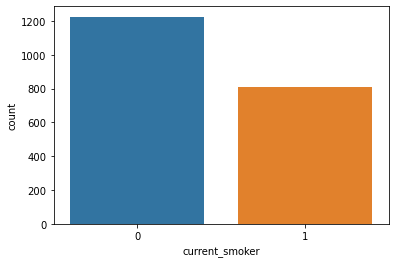

In [19]:
# Plotting data distribution in categorical variables- Current Smoker
sns.countplot(newchd_df.current_smoker)

/Users/njraman/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='bp_meds', ylabel='count'>

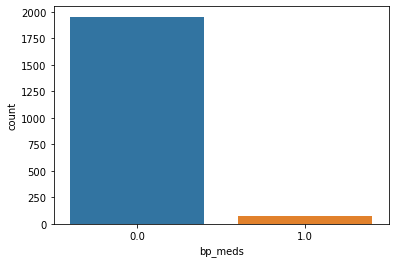

In [20]:
# Plotting data distribution in categorical variables- Bp Meds
sns.countplot(newchd_df.bp_meds)

/Users/njraman/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='prevalent_stroke', ylabel='count'>

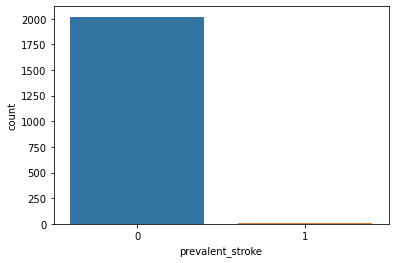

In [21]:
# Plotting data distribution in categorical variables- Prevalent Stroke
sns.countplot(newchd_df.prevalent_stroke)

/Users/njraman/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='prevalent_hyp', ylabel='count'>

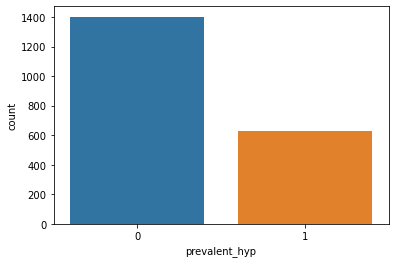

In [22]:
# Plotting data distribution in categorical variables- Prevalent Hypertension
sns.countplot(newchd_df.prevalent_hyp)

/Users/njraman/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='diabetes', ylabel='count'>

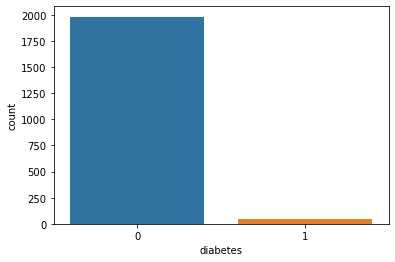

In [23]:
# Plotting data distribution in categorical variables- Diabetes
sns.countplot(newchd_df.diabetes)

/Users/njraman/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='ten_year_chd', ylabel='count'>

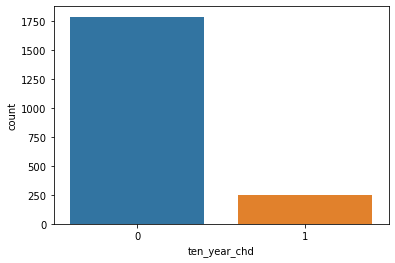

In [24]:
# Plotting data distribution in Target Variable -  Ten year CHD
sns.countplot(newchd_df.ten_year_chd)

/Users/njraman/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cigs_per_day', ylabel='Density'>

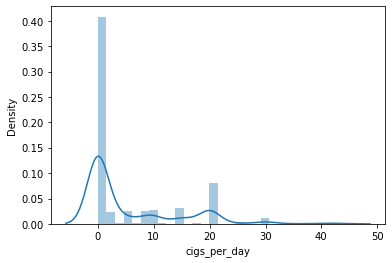

In [25]:
# Plotting data distribution in numerical variables - Ciagarettes per Day
sns.distplot(newchd_df['cigs_per_day'])

/Users/njraman/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tot_chol', ylabel='Density'>

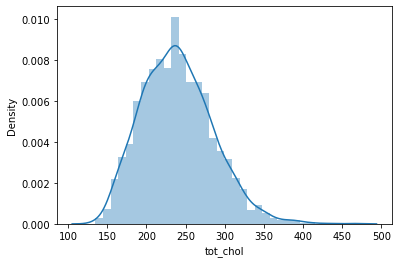

In [26]:
# Plotting data distribution in numerical variables - Total Cholestrol
sns.distplot(newchd_df['tot_chol'])

/Users/njraman/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sys_bp', ylabel='Density'>

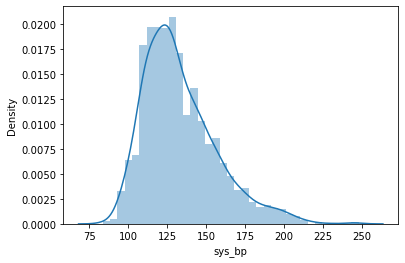

In [27]:
# Plotting data distribution in numerical variables - Systolic Blood pressure
sns.distplot(newchd_df['sys_bp'])

/Users/njraman/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='dia_bp', ylabel='Density'>

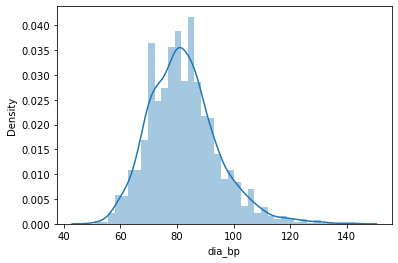

In [28]:
# Plotting data distribution in numerical variables - Diastolic Blood Pressure
sns.distplot(newchd_df['dia_bp'])

/Users/njraman/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bmi', ylabel='Density'>

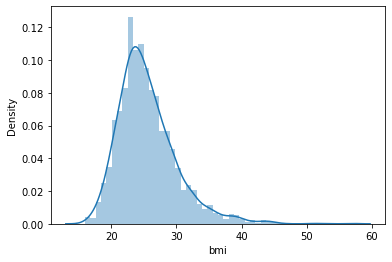

In [29]:
# Plotting data distribution in numerical variables - BMI
sns.distplot(newchd_df['bmi'])

/Users/njraman/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='heart_rate', ylabel='Density'>

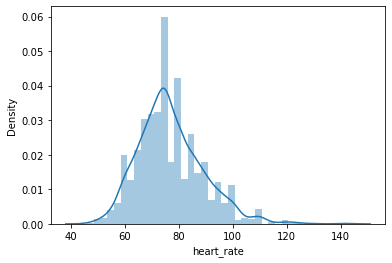

In [30]:
# Plotting data distribution in numerical variables - Heart Rate
sns.distplot(newchd_df['heart_rate'])

/Users/njraman/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='glucose', ylabel='Density'>

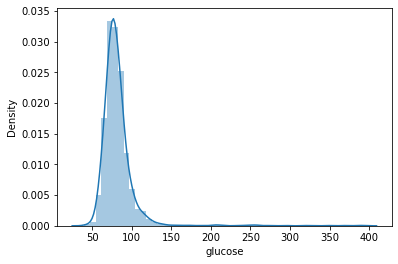

In [31]:
# Plotting data distribution in numerical variables - Glucose
sns.distplot(newchd_df['glucose'])

## Analyzing Relationships

                       age  education  current_smoker  cigs_per_day   bp_meds  \
age               1.000000  -0.167121       -0.265804     -0.235161  0.169665   
education        -0.167121   1.000000        0.098896      0.061008 -0.024388   
current_smoker   -0.265804   0.098896        1.000000      0.775689 -0.036526   
cigs_per_day     -0.235161   0.061008        0.775689      1.000000 -0.027020   
bp_meds           0.169665  -0.024388       -0.036526     -0.027020  1.000000   
prevalent_stroke  0.047348  -0.056972       -0.036305     -0.033827  0.118324   
prevalent_hyp     0.415126  -0.121469       -0.162150     -0.129974  0.297707   
diabetes          0.107209  -0.066435       -0.018550     -0.011312  0.084004   
tot_chol          0.427181  -0.028459       -0.092603     -0.072680  0.124780   
sys_bp            0.480988  -0.152336       -0.175252     -0.131290  0.285684   
dia_bp            0.315356  -0.098403       -0.171997     -0.122044  0.229179   
bmi               0.228835  

Text(0.5, 1.0, 'Correlation among all the Variables of the Dataset')

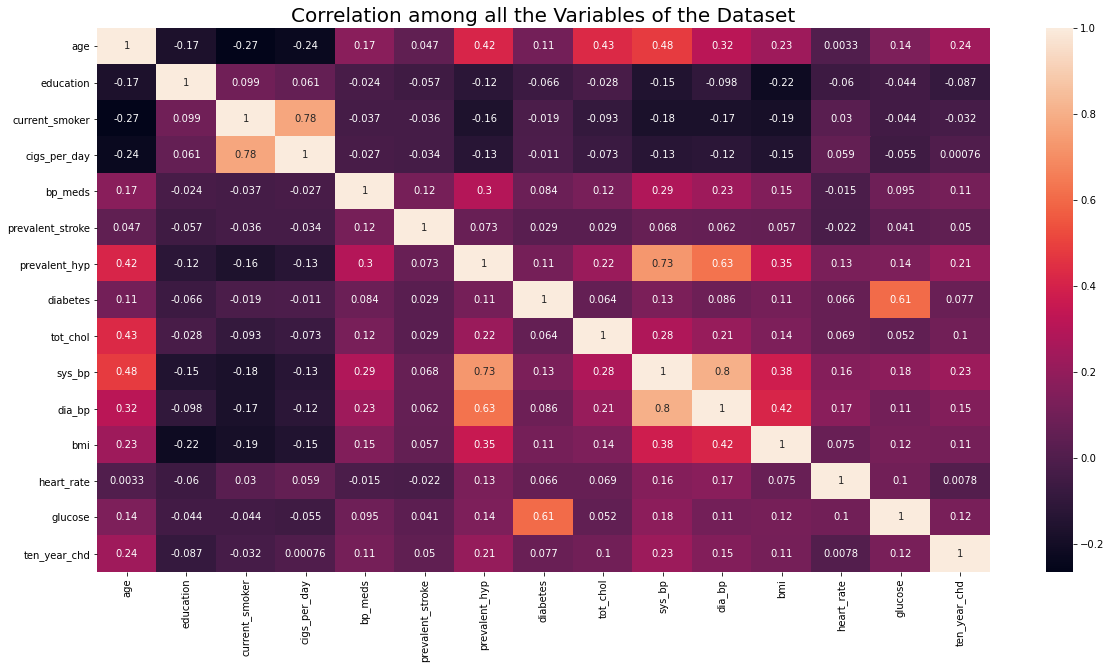

In [32]:
#Checking correlation between the different variables
print (newchd_df.corr())
plt.figure(figsize=(20,10), facecolor='w')
sns.heatmap(newchd_df.corr(),annot=True)
plt.title("Correlation among all the Variables of the Dataset", size=20)

# Feature Selection

In [33]:
# Defining the X and y values
y = newchd_df["ten_year_chd"]
X = newchd_df.drop(columns=["ten_year_chd"])

In [34]:
# Splitting data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
   y, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(1524, 14)
(508, 14)


In [35]:
#Code reference: https://machinelearningmastery.com/feature-selection-with-numerical-input-data/
# Calculating Feature Scores using f Classif
fs = SelectKBest(score_func=f_classif, k='all')
# learn relationship from training data
fs.fit(X_train, y_train)
# transform train input data
X_train_fs = fs.transform(X_train)
# transform test input data
X_test_fs = fs.transform(X_test)

                          0                 1
age               87.027259               age
prevalent_hyp     64.852047     prevalent_hyp
sys_bp            64.037457            sys_bp
glucose           34.681623           glucose
dia_bp            27.732368            dia_bp
bmi               23.202443               bmi
bp_meds           22.117000           bp_meds
diabetes          19.947033          diabetes
tot_chol          17.911869          tot_chol
education          9.590030         education
prevalent_stroke   6.128262  prevalent_stroke
current_smoker     1.270352    current_smoker
heart_rate         0.539462        heart_rate
cigs_per_day       0.124155      cigs_per_day


<AxesSubplot:>

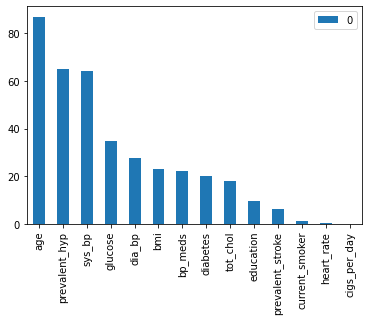

In [36]:
#Printing and Plotting Feature scores
# Code reference: https://stackoverflow.com/questions/41900387/mapping-column-names-to-random-forest-feature-importances
scores = list(zip(fs.scores_,X.columns))
scores.sort(reverse=True)
scores_df = pd.DataFrame(scores, index=[x for (_,x) in scores])
print(scores_df)
scores_df.plot(kind = 'bar')

In [37]:
#Code reference: https://machinelearningmastery.com/feature-selection-with-numerical-input-data/
# Calculating Feature Scores using Mutual Information Feature Selection
fs = SelectKBest(score_func=mutual_info_classif, k='all')
# learn relationship from training data
fs.fit(X_train, y_train)
# transform train input data
X_train_fs = fs.transform(X_train)
# transform test input data
X_test_fs = fs.transform(X_test)

                         0                 1
age               0.026918               age
prevalent_hyp     0.019638     prevalent_hyp
sys_bp            0.015895            sys_bp
bmi               0.011686               bmi
dia_bp            0.008190            dia_bp
current_smoker    0.007970    current_smoker
prevalent_stroke  0.006396  prevalent_stroke
education         0.006269         education
bp_meds           0.004210           bp_meds
diabetes          0.002497          diabetes
glucose           0.000894           glucose
tot_chol          0.000000          tot_chol
heart_rate        0.000000        heart_rate
cigs_per_day      0.000000      cigs_per_day


<AxesSubplot:>

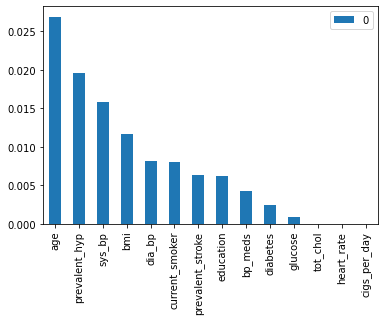

In [38]:
#Printing and Plotting Feature scores
# Code reference: https://stackoverflow.com/questions/41900387/mapping-column-names-to-random-forest-feature-importances
scores = list(zip(fs.scores_,X.columns))
scores.sort(reverse=True)
scores_df = pd.DataFrame(scores, index=[x for (_,x) in scores])
print(scores_df)
scores_df.plot(kind = 'bar')

In [39]:
# Calculating Feature Scores using Mutual Information Feature Selection
fs = SelectKBest(score_func=chi2, k='all')
# learn relationship from training data
fs.fit(X_train, y_train)
# transform train input data
X_train_fs = fs.transform(X_train)
# transform test input data
X_test_fs = fs.transform(X_test)

                           0                 1
glucose           275.455576           glucose
sys_bp            258.256982            sys_bp
tot_chol          152.342244          tot_chol
age               118.048733               age
dia_bp             48.583489            dia_bp
prevalent_hyp      42.625704     prevalent_hyp
bp_meds            20.969453           bp_meds
diabetes           19.197415          diabetes
bmi                17.841599               bmi
prevalent_stroke    6.083634  prevalent_stroke
education           4.635615         education
cigs_per_day        1.745328      cigs_per_day
heart_rate          1.066080        heart_rate
current_smoker      0.781424    current_smoker


<AxesSubplot:>

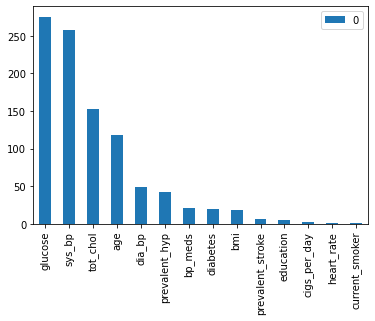

In [40]:
#Printing and Plotting Feature scores
# Code reference: https://stackoverflow.com/questions/41900387/mapping-column-names-to-random-forest-feature-importances
scores = list(zip(fs.scores_,X.columns))
scores.sort(reverse=True)
scores_df = pd.DataFrame(scores, index=[x for (_,x) in scores])
print(scores_df)
scores_df.plot(kind = 'bar')

In [41]:
# Features removed based on EDA and Feature scores
chd_mlm_df = newchd_df.drop(columns = ["prevalent_stroke","heart_rate","education","cigs_per_day","current_smoker"])
chd_mlm_df

,age,bp_meds,prevalent_hyp,diabetes,tot_chol,sys_bp,dia_bp,bmi,glucose,ten_year_chd
0,46,0.0,0,0,250.0,121.0,81.0,28.73,76.0,0
1,61,0.0,1,0,225.0,150.0,95.0,28.58,103.0,1
2,46,0.0,0,0,285.0,130.0,84.0,23.10,85.0,0
3,43,0.0,1,0,228.0,180.0,110.0,30.30,99.0,0
4,63,0.0,0,0,205.0,138.0,71.0,33.11,85.0,1
...,...,...,...,...,...,...,...,...,...,...
2029,59,0.0,0,0,251.0,125.0,80.0,22.18,70.0,0
2030,63,0.0,1,0,266.0,167.0,94.0,25.23,94.0,0
2031,52,0.0,0,0,265.0,137.5,84.5,26.91,86.0,0
2032,50,0.0,1,1,260.0,190.0,130.0,43.67,260.0,0


# Define New X and Y values and Train-Test Split

In [74]:
# Defining the X and y values for MLM
y = chd_mlm_df["ten_year_chd"]
X = chd_mlm_df.drop(columns=["ten_year_chd"])

In [165]:
# Splitting data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
   y, random_state=1, test_size=0.10)
print(X_train.shape)
print(X_test.shape)

(1828, 9)
(204, 9)


# Resample - Oversampling

In [166]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
ros = RandomOverSampler(random_state=1)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
Counter(y_resampled)


Counter({0: 1608, 1: 1608})

# Feature Scaling with Robust Scaler

In [167]:
# Applying the Robust Scaler to scale the data
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_scaler = scaler.fit(X_resampled)
X_train_scaled = X_scaler.transform(X_resampled)
X_test_scaled = X_scaler.transform(X_test)

# Logistic Regression

In [178]:
classifier = LogisticRegression(solver='liblinear', random_state=1,penalty="l1",C=0.1)
classifier.fit(X_train_scaled, y_resampled)
y_pred = classifier.predict(X_test_scaled)

In [179]:
# Displaying the accuracy score,Confusion Matrix, Classification report
from sklearn.metrics import balanced_accuracy_score,confusion_matrix
from imblearn.metrics import classification_report_imbalanced
accuracyScore = balanced_accuracy_score(y_test, y_pred)
print("Accuracy Score for Logistic regression:")
print(accuracyScore)
matrix = confusion_matrix(y_test, y_pred)
# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    matrix, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
print("Confusion Matrix")
print(cm_df)
report = classification_report_imbalanced(y_test, y_pred)
print("Classification report")
print(report)

Accuracy Score for Logistic regression:
0.6452922077922079
Confusion Matrix
          Predicted 0  Predicted 1
Actual 0          114           62
Actual 1           10           18
Classification report
                   pre       rec       spe        f1       geo       iba       sup

          0       0.92      0.65      0.64      0.76      0.65      0.42       176
          1       0.23      0.64      0.65      0.33      0.65      0.42        28

avg / total       0.82      0.65      0.64      0.70      0.65      0.42       204



# Decision Tree Model

In [56]:
from sklearn.tree import DecisionTreeClassifier
# Creating the decision tree classifier instance.
model = DecisionTreeClassifier()
# Fitting the model.
model = model.fit(X_train_scaled, y_resampled)
#Predicting y values
y_pred = model.predict(X_test_scaled)

In [57]:
# Displaying the accuracy score,Confusion Matrix, Classification report
from sklearn.metrics import balanced_accuracy_score,confusion_matrix
from imblearn.metrics import classification_report_imbalanced
accuracyScore = balanced_accuracy_score(y_test, y_pred)
print("Accuracy Score for Logistic regression:")
print(accuracyScore)
matrix = confusion_matrix(y_test, y_pred)
# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    matrix, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
print("Confusion Matrix")
print(cm_df)
report = classification_report_imbalanced(y_test, y_pred)
print("Classification report")
print(report)

Accuracy Score for Logistic regression:
0.5130325814536341
Confusion Matrix
          Predicted 0  Predicted 1
Actual 0          310           40
Actual 1           49            8
Classification report
                   pre       rec       spe        f1       geo       iba       sup

          0       0.86      0.89      0.14      0.87      0.35      0.13       350
          1       0.17      0.14      0.89      0.15      0.35      0.12        57

avg / total       0.77      0.78      0.24      0.77      0.35      0.13       407



# Random Forest method

In [174]:
from sklearn.ensemble import RandomForestClassifier
# Creating the decision tree classifier instance.
model = RandomForestClassifier(n_estimators=128, random_state=78) 
# Fitting the model.
model = model.fit(X_train_scaled, y_resampled)
#Predicting y values
y_pred = model.predict(X_test_scaled)

In [175]:
# Displaying the accuracy score,Confusion Matrix, Classification report
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
accuracyScore = accuracy_score(y_test, y_pred)
print("Accuracy Score for Random Forest Model:")
print(accuracyScore)
matrix = confusion_matrix(y_test, y_pred)
# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    matrix, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
print("Confusion Matrix")
print(cm_df)
report = classification_report(y_test, y_pred)
print("Classification report")
print(report)

Accuracy Score for Random Forest Model:
0.8284313725490197
Confusion Matrix
          Predicted 0  Predicted 1
Actual 0          166           10
Actual 1           25            3
Classification report
              precision    recall  f1-score   support

           0       0.87      0.94      0.90       176
           1       0.23      0.11      0.15        28

    accuracy                           0.83       204
   macro avg       0.55      0.53      0.53       204
weighted avg       0.78      0.83      0.80       204



# Gradient Boosting Method

In [62]:
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier(n_estimators=20,
   learning_rate=0.5, max_features=5, max_depth=3, random_state=0)

classifier.fit(X_train_scaled, y_resampled)
y_pred = classifier.predict(X_test_scaled)

In [63]:
# Displaying the accuracy score,Confusion Matrix, Classification report
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
accuracyScore = accuracy_score(y_test, y_pred)
print("Accuracy Score for Gradient Boosting Model:")
print(accuracyScore)
matrix = confusion_matrix(y_test, y_pred)
# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    matrix, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
print("Confusion Matrix")
print(cm_df)
report = classification_report(y_test, y_pred)
print("Classification report")
print(report)

Accuracy Score for Gradient Boosting Model:
0.7371007371007371
Confusion Matrix
          Predicted 0  Predicted 1
Actual 0          277           73
Actual 1           34           23
Classification report
              precision    recall  f1-score   support

           0       0.89      0.79      0.84       350
           1       0.24      0.40      0.30        57

    accuracy                           0.74       407
   macro avg       0.57      0.60      0.57       407
weighted avg       0.80      0.74      0.76       407



# Resampling - Undersampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
ros = RandomUnderSampler(random_state=1)
X_resampled, y_resampled = ros.fit_resample(X_train_scaled, y_train)

# Logistic Regression

In [ ]:
classifier = LogisticRegression()
classifier.fit(X_resampled, y_resampled)
y_pred = classifier.predict(X_test_scaled)

In [ ]:
# Displaying the accuracy score,Confusion Matrix, Classification report
from sklearn.metrics import balanced_accuracy_score,confusion_matrix
from imblearn.metrics import classification_report_imbalanced
accuracyScore = balanced_accuracy_score(y_test, y_pred)
print("Accuracy Score for Logistic regression:")
print(accuracyScore)
matrix = confusion_matrix(y_test, y_pred)
# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    matrix, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
print("Confusion Matrix")
print(cm_df)
report = classification_report_imbalanced(y_test, y_pred)
print("Classification report")
print(report)

# Decision Tree Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Creating the decision tree classifier instance.
model = DecisionTreeClassifier()
# Fitting the model.
model = model.fit(X_resampled, y_resampled)
#Predicting y values
y_pred = model.predict(X_test_scaled)

In [ ]:
# Displaying the accuracy score,Confusion Matrix, Classification report
from sklearn.metrics import balanced_accuracy_score,confusion_matrix
from imblearn.metrics import classification_report_imbalanced
accuracyScore = balanced_accuracy_score(y_test, y_pred)
print("Accuracy Score for Logistic regression:")
print(accuracyScore)
matrix = confusion_matrix(y_test, y_pred)
# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    matrix, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
print("Confusion Matrix")
print(cm_df)
report = classification_report_imbalanced(y_test, y_pred)
print("Classification report")
print(report)

# Random Forest Method

In [172]:
from sklearn.ensemble import RandomForestClassifier
# Creating the decision tree classifier instance.
model = RandomForestClassifier(n_estimators=128, random_state=78) 
# Fitting the model.
model = model.fit(X_resampled, y_resampled)
#Predicting y values
y_pred = model.predict(X_test_scaled)

In [173]:
# Displaying the accuracy score,Confusion Matrix, Classification report
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
accuracyScore = accuracy_score(y_test, y_pred)
print("Accuracy Score for Random Forest Model:")
print(accuracyScore)
matrix = confusion_matrix(y_test, y_pred)
# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    matrix, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
print("Confusion Matrix")
print(cm_df)
report = classification_report(y_test, y_pred)
print("Classification report")
print(report)

Accuracy Score for Random Forest Model:
0.13725490196078433
Confusion Matrix
          Predicted 0  Predicted 1
Actual 0            0          176
Actual 1            0           28
Classification report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       176
           1       0.14      1.00      0.24        28

    accuracy                           0.14       204
   macro avg       0.07      0.50      0.12       204
weighted avg       0.02      0.14      0.03       204



/Users/njraman/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/njraman/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/njraman/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

# Gradient Boosting Method

In [170]:
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier(n_estimators=20,
   learning_rate=0.5, max_features=5, max_depth=3, random_state=0)

classifier.fit(X_resampled, y_resampled)
y_pred = classifier.predict(X_test_scaled)

In [171]:
# Displaying the accuracy score,Confusion Matrix, Classification report
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
accuracyScore = accuracy_score(y_test, y_pred)
print("Accuracy Score for Gradient Boosting Model:")
print(accuracyScore)
matrix = confusion_matrix(y_test, y_pred)
# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    matrix, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
print("Confusion Matrix")
print(cm_df)
report = classification_report(y_test, y_pred)
print("Classification report")
print(report)

Accuracy Score for Gradient Boosting Model:
0.13725490196078433
Confusion Matrix
          Predicted 0  Predicted 1
Actual 0            0          176
Actual 1            0           28
Classification report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       176
           1       0.14      1.00      0.24        28

    accuracy                           0.14       204
   macro avg       0.07      0.50      0.12       204
weighted avg       0.02      0.14      0.03       204



/Users/njraman/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/njraman/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/njraman/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

# Combination Sampling

In [ ]:
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=0)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

In [ ]:
classifier = LogisticRegression(solver='lbfgs', random_state=1)
classifier.fit(X_resampled, y_resampled)
y_pred = classifier.predict(X_test_scaled)